## Load MNIST on Python 3.x

In [56]:
import pickle
import gzip
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

## Load USPS on Python 3.x

In [3]:
from PIL import Image
import os
import numpy as np

In [4]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

In [5]:
def getOneHot(y):
    y_OH = np.zeros((y.shape[0],10))
    for i in range(y.shape[0]):
        y_OH[i,y[i]]=1
    return y_OH

def one_hot_sanity_check(y,y_OH):
    for i in range(y.shape[0]):
        if np.argmax(y_OH[i])!=y[i]:
            print('sanity check failed at index: '+str(i))
            return False
    return True

In [6]:
X_train, y_train = training_data
X_cv, y_cv = validation_data
X_test, y_test = test_data

In [7]:
y_train_OH = getOneHot(y_train)

In [34]:
X_USPS = np.array(USPSMat)
y_USPS = np.array(USPSTar)


In [18]:
svm_model = svm.SVC(kernel='rbf',C=100,gamma=0.001)

In [19]:
svm_model.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
predicted_labels = svm_model.predict(X_test)


In [21]:
print("SVM accuracy score : ")
print(accuracy_score(y_test, predicted_labels))

SVM accuracy score : 
0.9715


In [3]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [8]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100],'gamma': [0.001, 0.0001]}

In [9]:
opt_model = GridSearchCV(cv=5,estimator=svm.SVC(),param_grid=parameters)

In [11]:
opt_model.fit(X_train[0:10000,:],y_train[0:10000])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10, 100], 'gamma': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
opt_model.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([  9.60221272,  27.20889168,   9.43715773, 375.49391718,
         37.1121911 ,  12.77032676,   9.67903633,  26.52306662,
          9.6210505 ,  10.06487179,   9.61932907,  12.25459766]),
 'std_fit_time': array([1.73923106e-01, 2.88492444e-01, 1.03689198e-01, 4.32384443e+02,
        2.80038919e+01, 2.39225920e-01, 3.00435332e-01, 2.98432269e-01,
        1.91722950e-01, 1.01539157e-01, 1.66001238e-01, 1.44474037e-01]),
 'mean_score_time': array([ 3.99588737,  8.27508245,  3.93612118, 15.2850019 , 22.95335498,
         5.00113835,  4.0531292 ,  8.13256454,  3.96013017,  4.22655592,
         3.98096476,  4.9324584 ]),
 'std_score_time': array([1.21753575e-01, 3.83574870e-02, 4.10048220e-02, 4.47947336e+00,
        3.78918562e+01, 7.50249095e-02, 1.52918460e-01, 3.70471231e-02,
        4.11755213e-02, 1.28111605e-01, 3.12017242e-02, 7.90479888e-02]),
 'param_C': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10, 100, 100, 100, 100],
              mask=[False, False, Fals

In [60]:
best_svm = opt_model.best_estimator_

In [44]:
best_svm.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
predicted_labels = best_svm.predict(X_test)

In [46]:
print("SVM accuracy score MNIST")
print(accuracy_score(y_test, predicted_labels))

SVM accuracy score MNIST
0.9715


In [47]:
predicted_labels = best_svm.predict(X_USPS)

In [48]:
print("SVM accuracy score USPS: ")
print(accuracy_score(y_USPS, predicted_labels))

SVM accuracy score USPS: 
0.3530176508825441


In [58]:
rf_clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train)

y_pred=rf_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9704


In [59]:
y_pred = rf_clf.predict(X_USPS)
print(accuracy_score(y_USPS, y_pred))

0.3992199609980499


In [54]:
cv_accuracies = []
for n in tqdm_notebook(range(10,160,10)):
    rf_clf=RandomForestClassifier(n_estimators=n)
    #Train the model using the training sets y_pred=clf.predict(X_test)
    rf_clf.fit(X_train,y_train)
    y_pred=rf_clf.predict(X_cv)
    cv_accuracies.append(accuracy_score(y_cv, y_pred))

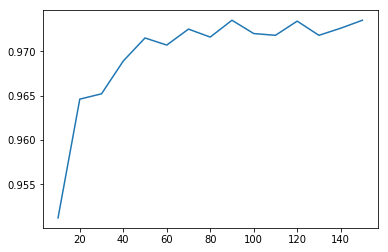

In [57]:
plt.plot(range(10,160,10),cv_accuracies)